<a href="https://colab.research.google.com/github/NikuDubenco/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Nicolae_Dubenco_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')
print(df.shape)
df.head()

(305, 4)


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [23]:
attributes = ['age', 'op_year', 'no_nodes', 'survived']
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=attributes)
df.head()

,age,op_year,no_nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [24]:
df.shape

(306, 4)

In [36]:
df.describe

<bound method NDFrame.describe of      age  op_year  no_nodes  survived
0     30       64         1         1
1     30       62         3         1
2     30       65         0         1
3     31       59         2         1
4     31       65         4         1
5     33       58        10         1
6     33       60         0         1
7     34       59         0         0
8     34       66         9         0
9     34       58        30         1
10    34       60         1         1
11    34       61        10         1
12    34       67         7         1
13    34       60         0         1
14    35       64        13         1
15    35       63         0         1
16    36       60         1         1
17    36       69         0         1
18    37       60         0         1
19    37       63         0         1
20    37       58         0         1
21    37       59         6         1
22    37       60        15         1
23    37       63         0         1
24    38       6

In [37]:
df.describe()

,age,op_year,no_nodes,survived
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [25]:
df.isnull().sum()

age         0
op_year     0
no_nodes    0
survived    0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age         306 non-null int64
op_year     306 non-null int64
no_nodes    306 non-null int64
survived    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [28]:
df['survived'].unique()

array([1, 2])

In [34]:
df['survived'].replace(2, 0, inplace=True)
df.head(10)  # screened 10 rows as is not possible to see all changes in the default 5 rows of '.head()'

,age,op_year,no_nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# TODO

In [38]:
pd.crosstab(df['no_nodes'], columns='count')

col_0,count
no_nodes,
0,136
1,41
2,20
3,20
4,13
5,6
6,7
7,7
8,7


In [39]:
pd.crosstab(df['survived'], df['no_nodes'])

no_nodes,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,28,30,35,46,52
survived,,,,,,,,,,,,,,,,,,,,,
0,19,8,5,7,3,4,3,2,2,4,...,1,1,3,1,0,0,0,1,0,1
1,117,33,15,13,10,2,4,5,5,2,...,0,2,0,0,1,1,1,0,1,0


In [40]:
pd.crosstab(df['survived'], df['no_nodes'], normalize='columns')

no_nodes,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,28,30,35,46,52
survived,,,,,,,,,,,,,,,,,,,,,
0,0.139706,0.195122,0.25,0.35,0.230769,0.666667,0.428571,0.285714,0.285714,0.666667,...,1.0,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.860294,0.804878,0.75,0.65,0.769231,0.333333,0.571429,0.714286,0.714286,0.333333,...,0.0,0.666667,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


In [52]:
no_node_bins = pd.cut(df['no_nodes'], 5)
ct1 = pd.crosstab(no_node_bins, df['survived'], normalize='columns')
ct1

survived,0,1
no_nodes,,
"(-0.052, 10.4]",0.716049,0.924444
"(10.4, 20.8]",0.185185,0.048889
"(20.8, 31.2]",0.074074,0.022222
"(31.2, 41.6]",0.012346,0.000000
"(41.6, 52.0]",0.012346,0.004444


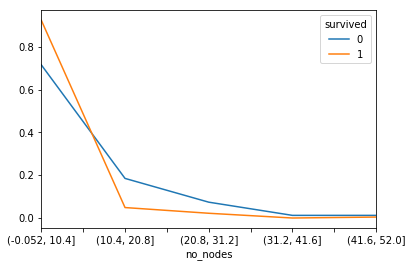

In [53]:
ct1.plot();

In [56]:
ct2 = pd.crosstab(no_node_bins, df['survived'], normalize='index')
ct2

survived,0,1
no_nodes,,
"(-0.052, 10.4]",0.218045,0.781955
"(10.4, 20.8]",0.576923,0.423077
"(20.8, 31.2]",0.545455,0.454545
"(31.2, 41.6]",1.000000,0.000000
"(41.6, 52.0]",0.500000,0.500000


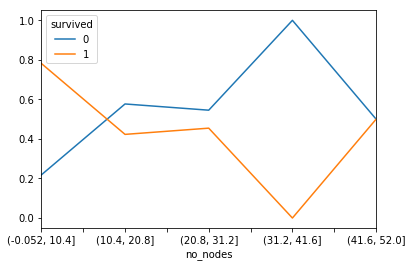

In [57]:
ct2.plot();

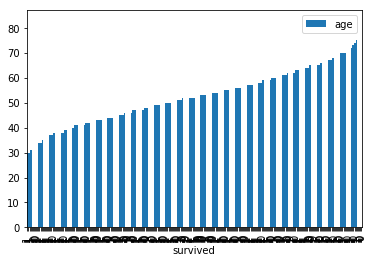

In [65]:
df.plot( 'survived', 'age', kind='bar');

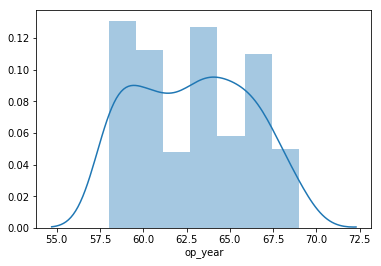

In [66]:
sns.distplot(df['op_year']);

In [68]:
ct3 = pd.crosstab(df['survived'] ,no_node_bins.astype('U32'), normalize='columns')
ct3

no_nodes,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
survived,,,,,
0,0.218045,0.576923,0.545455,1.0,0.5
1,0.781955,0.423077,0.454545,0.0,0.5


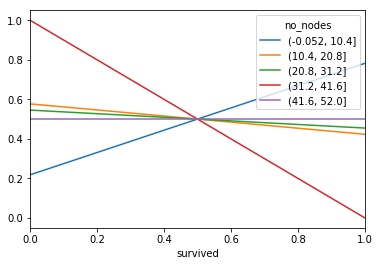

In [107]:
ct3.plot()

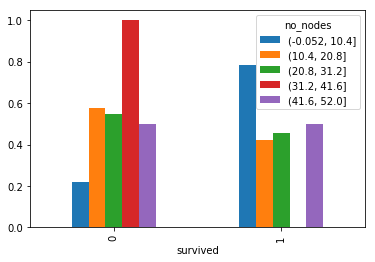

In [69]:
ct3.plot(kind='bar')

In [110]:
ct4 = pd.crosstab(no_node_bins.astype('U32'), df['survived'])
ct4

survived,0,1
no_nodes,,
"(-0.052, 10.4]",58,208
"(10.4, 20.8]",15,11
"(20.8, 31.2]",6,5
"(31.2, 41.6]",1,0
"(41.6, 52.0]",1,1


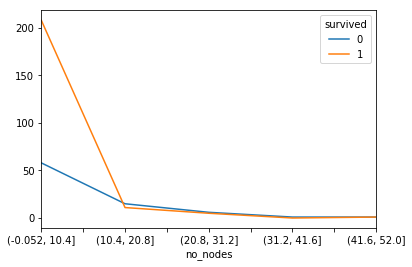

In [111]:
ct4.plot()

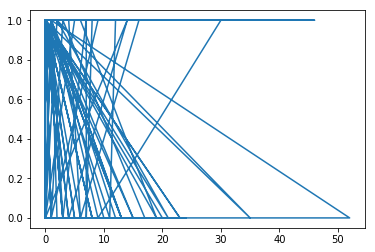

In [116]:
plt.plot(df.no_nodes, df.survived)

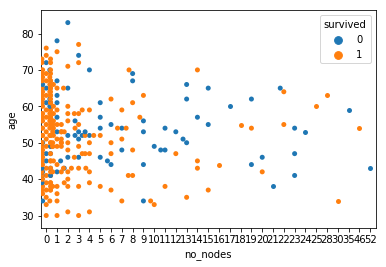

In [71]:
sns.swarmplot(df['no_nodes'], df['age'], df['survived']);

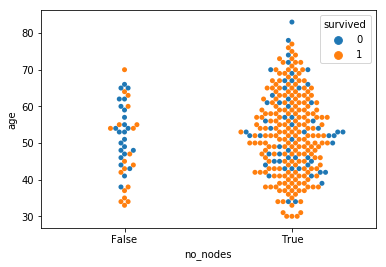

In [73]:
sns.swarmplot(df['no_nodes'] < 10, df['age'], df['survived']);

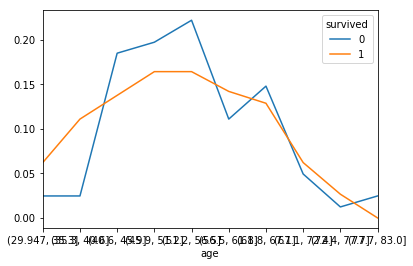

In [117]:
age_bins = pd.cut(df['age'], 10)
ct5 = pd.crosstab(age_bins, df['survived'], normalize='columns')
ct5.plot()

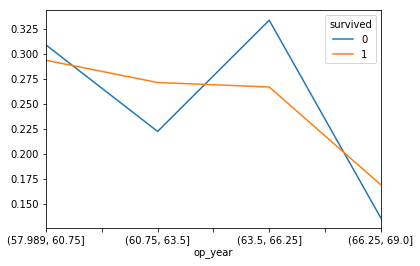

In [120]:
year_bin = pd.cut(df['op_year'], 4)
ct6 = pd.crosstab(year_bin, df['survived'], normalize='columns')
ct6.plot()

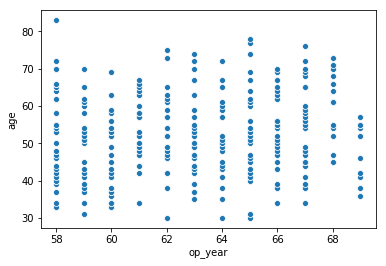

In [121]:
sns.scatterplot(x='op_year', y='age', data=df)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
Positive relationship is when the (input) values of the feature increase the (output) rate of surviving increases too.
Actualy I couldn't find one.

- What is at least one feature that looks to have a negative relationship with survival?
Negative relationship is when the (input) values of the feature increase the (output) rate of surviving decreases.
It seams like bigger the number of nodes is the  more chances to survive.

- How are those two features related with each other, and what might that mean?
Features 'age' and 'number of node' have no correlation.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.